# Table of Contents

1) [Background](#Background)

2) [Read the Files](#ReadtheFiles)

3) [Exploratory Data Analysis (EDA)](#ExploratoryDataAnalysis(EDA))

4) [Linear Regression model: Couple/Dependents rate vs Individual Rate](#LinearRegressionmodel:Couple/DependentsratevsIndividualRate)

5) [Linear Regression Model: Insurance rate vs AV Output](#LinearRegressionModel:InsuranceratevsAVOutput)

6) [Time Series Model](#TimeSeriesModel)

7) [Conclusion](#Conclusion)


<a id="Background"></a>
# 1) Background

The U.S. health care system is unique among advanced industrialized countries. The U.S. does not have a uniform health system, has no universal health care coverage, and only recently enacted legislation mandating healthcare coverage for almost everyone. In 2014, 283.2 million people in the U.S., 89.6 percent of the U.S. population had some type of health insurance, with 66 percent of workers covered by a private health insurance plan. Nearly 32.9 million people in the U.S. had no health insurance.

**Project:**

The goal of this project is to explore the Health Insurance dataset to see how the prices vary for each individuals, in each state. How is the rate affected by the age group? How is the rate affected by time? I used a linear regression model to see how each type of insurance rates vary from one another. Another key metric in the data set is Actuarial Value (AV) which is the percentage of total costs of that benefit plan covered by the insurance company. I built another regression model to see the relationship between the insurance rates and the percentage of how much is covered by the insurance. The last model I built was a time series model to forecast how the prices would trend in the future. 

<a id="ReadtheFiles"></a>
# 2) Read the Files

Import the libraries first and then read the files.

In [1]:
%matplotlib inline
import numpy as np
import os.path
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib
import pandas as pd
import seaborn as sns


In [ ]:
rate = pd.read_csv('./data/Rate.csv')
benefit= pd.read_csv('./data/BenefitsCostSharing.csv')
network=pd.read_csv('./data/Network.csv')
rules=pd.read_csv('./data/BusinessRules.csv')
attribute=pd.read_csv('./data/PlanAttributes.csv')

In [4]:
rate.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


In [5]:
benefit.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


Inner join between two datasets

In [6]:
result=pd.merge(benefit,rate,how='inner',left_index=True, right_index=True)

In [7]:
result.head()

,BenefitName,BusinessYear_x,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber_y
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


<a id="ExploratoryDataAnalysis(EDA)"></a>
# 3) Exploratory Data Analysis (EDA)

Check the size of the dataset and remove any Nans

In [8]:
result.shape

(5048408, 56)

In [9]:
result.isnull().sum()

BenefitName                                        0
BusinessYear_x                                     0
CoinsInnTier1                                1113847
CoinsInnTier2                                4571587
CoinsOutofNet                                1113847
CopayInnTier1                                1113847
CopayInnTier2                                4571587
CopayOutofNet                                1113849
EHBVarReason                                 3020737
Exclusions                                   4572247
Explanation                                  4075700
ImportDate_x                                       0
IsCovered                                     215980
IsEHB                                        1817362
IsExclFromInnMOOP                             983986
IsExclFromOonMOOP                             982626
IsStateMandate                               4250463
IsSubjToDedTier1                             2465877
IsSubjToDedTier2                             2

In [129]:
result.dropna()

,BenefitName,BusinessYear_x,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber_y


In [612]:
result.dtypes

BenefitName                                   object
BusinessYear_x                                 int64
CoinsInnTier1                                 object
CoinsInnTier2                                 object
CoinsOutofNet                                 object
CopayInnTier1                                 object
CopayInnTier2                                 object
CopayOutofNet                                 object
EHBVarReason                                  object
Exclusions                                    object
Explanation                                   object
ImportDate_x                                  object
IsCovered                                     object
IsEHB                                         object
IsExclFromInnMOOP                             object
IsExclFromOonMOOP                             object
IsStateMandate                                object
IsSubjToDedTier1                              object
IsSubjToDedTier2                              

In [133]:
result.IndividualRate.value_counts().shape

(118681,)

In [15]:
result.BenefitName.value_counts().shape

(861,)

Which Benefit plans are insured the most/least?

In [670]:
result.BenefitName.value_counts().head(10)

Orthodontia - Adult                                77377
Basic Dental Care - Child                          77353
Routine Dental Services (Adult)                    77353
Accidental Dental                                  77353
Basic Dental Care - Adult                          77353
Dental Check-Up for Children                       77353
Major Dental Care - Adult                          77353
Major Dental Care - Child                          77353
Orthodontia - Child                                77345
Treatment for Temporomandibular Joint Disorders    65724
Name: BenefitName, dtype: int64

In [671]:
result.BenefitName.value_counts().tail(10)

Hospice Outpatient                                        2
Routine Exams and X-rays - Child                          2
Coimplex Oral Surgery                                     2
Orthodontia for Cleft Palate or Cleft Lip only - Child    2
Immediate Dentiures                                       2
Vital pulpotomy                                           1
root Canal Therapy and Retreatment                        1
Prefab Resin Crown                                        1
Posterior Composites - Child                              1
Implant Adult                                             1
Name: BenefitName, dtype: int64

Visualization of Top 10 Health care benefits packages most selected

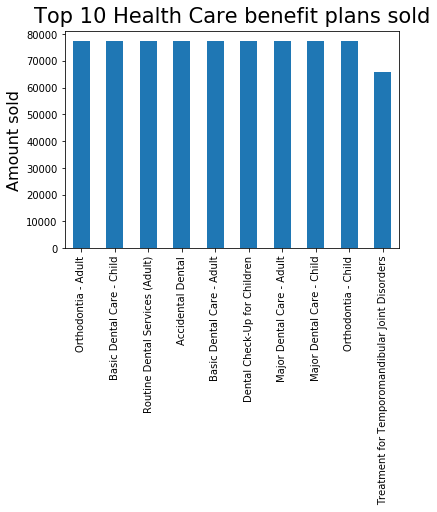

In [773]:
top10 = result['BenefitName'].value_counts().sort_values(ascending=False).head(10)
ax=top10.plot(kind='bar')
ax.set_title('Top 10 Health Care benefit plans sold', fontsize=21, y=1.01);
ax.set_ylabel('Amount sold', fontsize=16);

How does the individual Insurance rate vary for each benefit plam in each state?

In [721]:
season_linecount = result.groupby(['StateCode_x', 'BenefitName']).mean()[['IndividualRate']]
scount = season_linecount.sort_values(by=['StateCode_x','IndividualRate'], ascending=False)
scount

IndividualRate
StateCode_x BenefitName                                                       
WY          Inpatient Physician and Surgical Services             63340.903367
            Laboratory Outpatient and Professional Services       61633.878325
            Long-Term/Custodial Nursing Home Care                 60006.239425
            Diabetes Care Management                              58231.432284
            Infusion Therapy                                      58172.902234
            Infertility Treatment                                 56639.059019
            Hospice Services                                      56586.902792
            Mental/Behavioral Health Outpatient Services          56570.999848
            Imaging (CT/PET Scans, MRIs)                          56543.711658
            Diabetes Education                                    56537.088951
            Home Health Care Services                             54927.477800
            Nutritional Counseling                                54906.960000
            Chiropractic Care                                     54883.677631
            Inpatient Hospital Services (e.g., Hospital Stay)     54883.139137
            Hearing Aids                                          54881.815770
            Chemotherapy                                          54871.691624
            Preventive Care/Screening/Immunization                54870.669408
            Preferred Brand Drugs                                 54867.790305
            Cosmetic Surgery                                      54864.876701
            Mental/Behavioral Health Inpatient Services           54863.296751
            X-rays and Diagnostic Imaging                         54851.053993
            Prenatal and Postnatal Care                           54850.081320
            Delivery and All Inpatient Services for Materni...    54848.896142
            Non-Preferred Brand Drugs                             54846.847597
            Acupuncture                                           54833.215584
            Non-Emergency Care When Traveling Outside the U.S.    54794.051844
            Urgent Care Centers or Facilities                     53238.857107
            Primary Care Visit to Treat an Injury or Illness      53220.188325
            Specialist Visit                                      53208.818494
            Routine Foot Care                                     53192.179475
...                                                                        ...
AK          Hospice Services                                        249.981488
            Home Health Care Services                               249.646261
            Infusion Therapy                                        249.350290
            Preferred Brand Drugs                                   249.270508
            Newborn Hearing Screening                               248.966624
            Generic Drugs                                           248.337967
            Dialysis                                                248.037387
            Transplant                                              247.593430
            Mental/Behavioral Health Inpatient Services             247.374356
            Abortion for Which Public Funding is Prohibited         247.332541
            Outpatient Surgery Physician/Surgical Services          247.207278
            Diabetes Education                                      247.104247
            Bariatric Surgery                                       246.910835
            Cosmetic Surgery                                        246.672432
            Other Practitioner Office Visit (Nurse, Physici...      246.592849
            Acupuncture                                             246.388893
            Outpatient Facility Fee (e.g.,  Ambulatory Surg...      246.053085
            Inpatient Physician and Surgical Services               245.491688
            Inpatient Hospital Serv

In [781]:
#How many people are insured in each state?
result.StateCode_x.value_counts().head()

WI    512587
TX    465164
FL    364742
OH    331045
IL    320533
Name: StateCode_x, dtype: int64

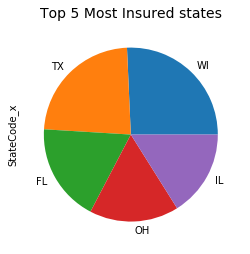

In [784]:
ax=result.StateCode_x.value_counts().head().plot(kind='pie')
ax.set_title('Top 5 Most Insured states', fontsize=14, y=1.01);

In [683]:
result.StateCode_x.value_counts().tail()

WV    32638
DE    31370
AL    28417
ID    27313
HI     6741
Name: StateCode_x, dtype: int64

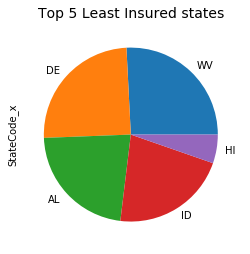

In [785]:
ax=result.StateCode_x.value_counts().tail().plot(kind='pie')
ax.set_title('Top 5 Least Insured states', fontsize=14, y=1.01);

Average individual insurance rate for each state

In [614]:
result.groupby('StateCode_x')['IndividualRate'].mean().head()

StateCode_x
AK       256.922905
AL    101857.038916
AR     18871.161688
AZ     13329.144659
DE     17373.433155
Name: IndividualRate, dtype: float64

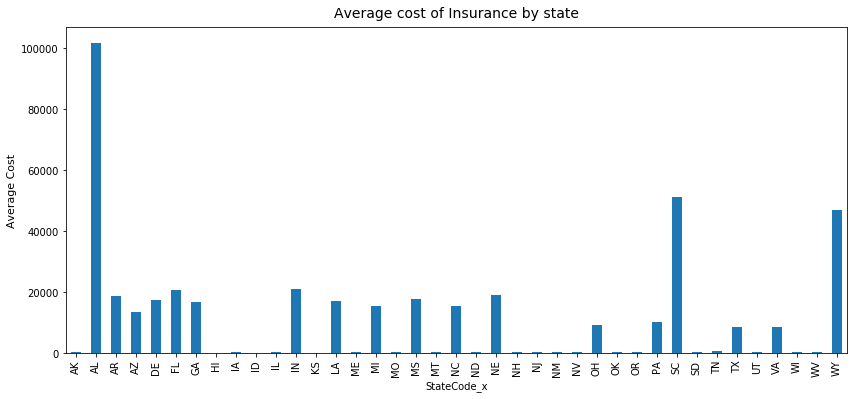

In [779]:
ax=result.groupby('StateCode_x')['IndividualRate'].mean().plot(kind='bar', figsize=(14,6));
ax.set_title('Average cost of Insurance by state', fontsize=14, y=1.01);
ax.set_ylabel('Average Cost', fontsize=11);

The count of each benefit plan insured

In [22]:
result.groupby('BenefitName')['IndividualRate'].count().sort_values(ascending=False).head(10)

BenefitName
Orthodontia - Adult                                77377
Major Dental Care - Child                          77353
Basic Dental Care - Child                          77353
Accidental Dental                                  77353
Basic Dental Care - Adult                          77353
Dental Check-Up for Children                       77353
Major Dental Care - Adult                          77353
Routine Dental Services (Adult)                    77353
Orthodontia - Child                                77345
Treatment for Temporomandibular Joint Disorders    65724
Name: IndividualRate, dtype: int64

Most/least expensive benefit plans

In [681]:
result.groupby('BenefitName')['IndividualRate'].mean().sort_values(ascending=False).head(10)

BenefitName
Outpatient Rehabiliation Services - Cognitive rehabilitation therapy       999999.0000
Outpatient Rehabiliation Services - Post-cochlear implant aural therapy    999999.0000
Telehealth / Telemedicine                                                  999999.0000
Autism Spectrum Disorders - Age 19 & Above                                 999999.0000
Adult Routine Retinal Screening                                            999999.0000
Home Health Care Services - Days 46-60                                     999999.0000
Adult Contact Lenses Fitting Evaluation                                    999999.0000
Outpatient Rehabilitation Services - Cognitive rehabiliation therapy       999999.0000
Biofeedback for treatment of medical diagnosis                             937501.0025
Adult Eyeglass Lenses                                                      933334.4620
Name: IndividualRate, dtype: float64

In [682]:
result.groupby('BenefitName')['IndividualRate'].mean().sort_values(ascending=False).tail(10)

BenefitName
Cast metal, stainless steel, porcelain/ceramic, all ceramic and resinbased composite onlay, or crown    11.538750
Non-Medically Necessary Orthodontia- Child                                                              10.990000
House Calls                                                                                              9.846154
Specialty Laboratory Services                                                                            9.269744
Testing Services                                                                                         9.058974
Active & Fit                                                                                             8.944615
Posterior Composite Fillings - Adults                                                                    0.000000
Implants - Child                                                                                         0.000000
Implants - Adults                                                           

In [25]:
result.groupby('BenefitName')['IndividualRate'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)


,count,mean
BenefitName,,
Orthodontia - Adult,77377,9374.218915
Dental Check-Up for Children,77353,9416.079088
Basic Dental Care - Child,77353,9338.453462
Basic Dental Care - Adult,77353,9428.815160
Accidental Dental,77353,9389.487990
Major Dental Care - Child,77353,9492.792737
Routine Dental Services (Adult),77353,9426.810067
Major Dental Care - Adult,77353,9530.892382
Orthodontia - Child,77345,9287.508466


How many people are insured each year?

In [684]:
result.BusinessYear_x.value_counts()

2015    2079286
2016    1804253
2014    1164869
Name: BusinessYear_x, dtype: int64

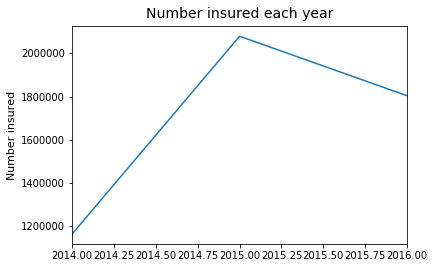

In [786]:
# The number of people insured by year
ax=result.BusinessYear_x.value_counts().sort_index().plot();
ax.set_title('Number insured each year', fontsize=14, y=1.01);
ax.set_ylabel('Number insured', fontsize=11);

How many people are insured by age group?

In [672]:
result.Age.value_counts().sort_index().head()

0-20    109838
21      109432
22      109432
23      109432
24      109432
Name: Age, dtype: int64

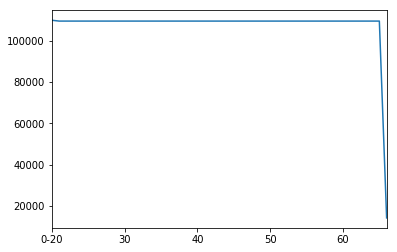

In [31]:
result.Age.value_counts().sort_index().plot();

Eliminate non numeric values

In [674]:
age=result[result.Age.apply(lambda x: x.isnumeric())]

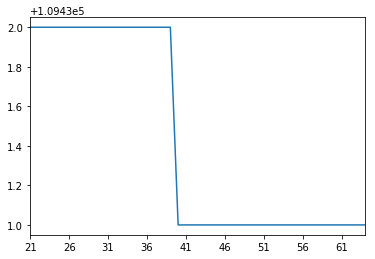

In [680]:
age.Age.value_counts().sort_index().plot();

Dental Plan seems to be the most insured plan, so from this point onwards, all analyses will be done for just the dental plans.

In [576]:
O=result[(result['BenefitName'] == 'Orthodontia - Adult') | (result['BenefitName'] == 'Basic Dental Care - Child') | (result['BenefitName'] == 'Routine Dental Services (Adult)')| (result['BenefitName'] == 'Basic Dental Care - Adult')| (result['BenefitName'] == 'Major Dental Care - Adult')| (result['BenefitName'] == 'Major Dental Care - Child')]

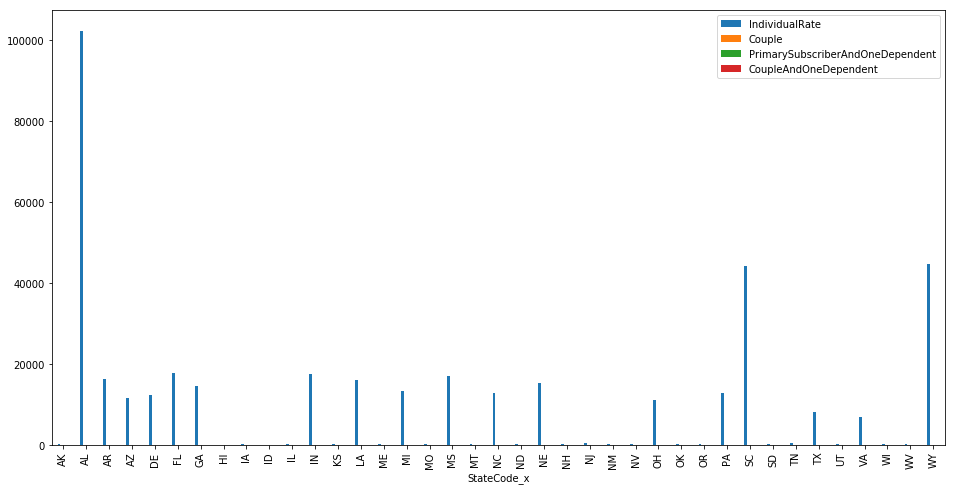

In [580]:
O.groupby('StateCode_x')['IndividualRate','Couple','PrimarySubscriberAndOneDependent','CoupleAndOneDependent'].mean().plot(kind='bar', figsize=(16,8));

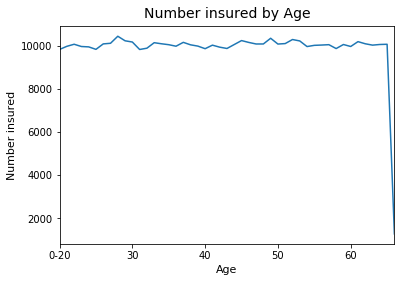

In [787]:
ax=O.Age.value_counts().sort_index().plot();
ax.set_title('Number insured by Age', fontsize=14, y=1.01);
ax.set_ylabel('Number insured', fontsize=11);
ax.set_xlabel('Age', fontsize=11);

In [33]:
from sklearn.linear_model import LinearRegression

In [584]:
O.corr()

,BusinessYear_x,IssuerId_x,IssuerId2_x,LimitQty,MinimumStay,RowNumber_x,VersionNum_x,BusinessYear_y,IssuerId_y,VersionNum_y,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber_y
BusinessYear_x,1.000000,-0.071798,-0.071798,0.046684,NaN,0.000023,0.075689,0.656390,0.029642,-0.063450,...,-0.020931,-0.051571,-0.054203,-0.034533,-0.039961,-0.089715,-0.040393,-0.077001,-0.106127,-0.215924
IssuerId_x,-0.071798,1.000000,1.000000,0.070041,NaN,0.000072,-0.015169,-0.063826,-0.046047,-0.056846,...,0.025578,-0.011137,0.119474,0.112470,0.145947,0.171518,0.128841,0.150389,0.170239,-0.040264
IssuerId2_x,-0.071798,1.000000,1.000000,0.070041,NaN,0.000072,-0.015169,-0.063826,-0.046047,-0.056846,...,0.025578,-0.011137,0.119474,0.112470,0.145947,0.171518,0.128841,0.150389,0.170239,-0.040264
LimitQty,0.046684,0.070041,0.070041,1.000000,NaN,0.135558,0.064070,0.001406,-0.058331,0.018063,...,-0.058557,-0.073911,0.149628,0.397366,0.135593,-0.021644,0.315101,0.140771,0.013259,-0.071019
MinimumStay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RowNumber_x,0.000023,0.000072,0.000072,0.135558,NaN,1.000000,0.000013,0.000036,0.000056,-0.000081,...,0.000060,0.002172,0.014148,0.023092,0.019839,0.013213,0.022456,0.018543,0.013311,0.000198
VersionNum_x,0.075689,-0.015169,-0.015169,0.064070,NaN,0.000013,1.000000,0.079796,0.076819,-0.026332,...,0.012327,-0.066138,0.198706,0.217262,0.260683,0.259078,0.224136,0.237018,0.239489,-0.043861
BusinessYear_y,0.656390,-0.063826,-0.063826,0.001406,NaN,0.000036,0.079796,1.000000,0.047854,0.013347,...,-0.054224,-0.024191,-0.075313,-0.062856,-0.027566,-0.077520,-0.052352,-0.077079,-0.102983,-0.034605
IssuerId_y,0.029642,-0.046047,-0.046047,-0.058331,NaN,0.000056,0.076819,0.047854,1.000000,-0.025775,...,0.034547,0.024734,0.116503,0.100246,0.137144,0.152251,0.116784,0.143701,0.152786,-0.091208
VersionNum_y,-0.063450,-0.056846,-0.056846,0.018063,NaN,-0.000081,-0.026332,0.013347,-0.025775,1.000000,...,0.017416,0.055921,0.193649,0.161318,0.161143,0.186947,0.171898,0.182102,0.196511,0.005735


This effectively joins 3 tables together: Rate, Benefits, and attributes table. We need the attributes table to gain access to the AV column to use that for regression analysis.

In [37]:
result_1=pd.merge(result,attribute,how='inner',left_index=True, right_index=True)

In [38]:
result_1.head()

,BenefitName,BusinessYear_x,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,TEHBOutOfNetFamilyMOOP,TEHBOutOfNetFamilyPerGroupMOOP,TEHBOutOfNetFamilyPerPersonMOOP,TEHBOutOfNetIndividualMOOP,TIN,URLForEnrollmentPayment,URLForSummaryofBenefitsCoverage,UniquePlanDesign,VersionNum,WellnessProgramOffered
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/mymoda/,https://www.modahealth.com/pdfs/plans/individu...,NaN,6,NaN
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/mymoda/,https://www.modahealth.com/pdfs/plans/individu...,NaN,6,NaN


In [586]:
result_1.dropna(axis=1).head()

,BenefitName,BusinessYear_x,ImportDate_x,IssuerId_x,IssuerId2_x,PlanId_x,RowNumber_x,SourceName_x,StandardComponentId_x,StateCode_x,...,PlanType,QHPNonQHPTypeId,RowNumber,ServiceAreaId,SourceName,StandardComponentId_y,StateCode,StateCode2_y,TIN,VersionNum
0,Routine Dental Services (Adult),2014,2014-03-19 07:06:49,21989,21989,21989AK0010001-00,68,HIOS,21989AK0010001,AK,...,PPO,Both,6,AKS001,HIOS,21989AK0020002,AK,AK,93-0438772,6
1,Dental Check-Up for Children,2014,2014-03-19 07:06:49,21989,21989,21989AK0010001-00,104,HIOS,21989AK0010001,AK,...,PPO,Both,7,AKS001,HIOS,21989AK0020002,AK,AK,93-0438772,6
2,Basic Dental Care - Child,2014,2014-03-19 07:06:49,21989,21989,21989AK0010001-00,110,HIOS,21989AK0010001,AK,...,PPO,Both,4,AKS001,HIOS,21989AK0020001,AK,AK,93-0438772,6
3,Orthodontia - Child,2014,2014-03-19 07:06:49,21989,21989,21989AK0010001-00,111,HIOS,21989AK0010001,AK,...,PPO,Both,4,AKS001,HIOS,21989AK0010001,AK,AK,93-0438772,6
4,Major Dental Care - Child,2014,2014-03-19 07:06:49,21989,21989,21989AK0010001-00,112,HIOS,21989AK0010001,AK,...,PPO,Both,5,AKS001,HIOS,21989AK0010001,AK,AK,93-0438772,6


<a id="LinearRegressionmodel:Couple/DependentsratevsIndividualRate"></a>
# 4) Linear Regression model: Couple/Dependents rate vs Individual Rate

In [627]:
result_1['Couple'].dropna(how='all')
result_1['IndividualTobaccoRate'].dropna(how='all')
result_1['PrimarySubscriberAndOneDependent'].dropna(how='all')
result_1['CoupleAndOneDependent'].dropna(how='all')
#result_1['IndividualRate'].dropna(how='all')
ortho=result_1[(result_1['BenefitName'] == 'Orthodontia - Adult') | (result_1['BenefitName'] == 'Basic Dental Care - Child') | (result_1['BenefitName'] == 'Routine Dental Services (Adult)')| (result_1['BenefitName'] == 'Basic Dental Care - Adult')| (result_1['BenefitName'] == 'Major Dental Care - Adult')| (result_1['BenefitName'] == 'Major Dental Care - Child')]

In [628]:
feature_cols1 = ['Couple','PrimarySubscriberAndOneDependent','CoupleAndOneDependent','IndividualRate']

In [629]:
V=ortho[feature_cols1]
lr = LinearRegression()
type(lr)
V.dropna(how='all').head()

,Couple,PrimarySubscriberAndOneDependent,CoupleAndOneDependent,IndividualRate
0,NaN,NaN,NaN,29.00
2,73.9,107.61,144.56,36.95
4,NaN,NaN,NaN,32.00
5,73.9,107.61,144.56,36.95
6,64.9,94.50,126.95,32.45


In [630]:
V = V[~pd.isnull(V)]

In [631]:
V.isnull().sum()

Couple                              7696
PrimarySubscriberAndOneDependent    7696
CoupleAndOneDependent               7696
IndividualRate                         0
dtype: int64

In [632]:
V.dropna(inplace=True)

In [633]:
V.head()

,Couple,PrimarySubscriberAndOneDependent,CoupleAndOneDependent,IndividualRate
2,73.90,107.61,144.56,36.95
5,73.90,107.61,144.56,36.95
6,64.90,94.50,126.95,32.45
9,64.90,94.50,126.95,32.45
573,76.35,79.16,117.37,38.13


In [634]:
feature_cols = ['Couple','PrimarySubscriberAndOneDependent','CoupleAndOneDependent']
X = V[feature_cols]
y = V.IndividualRate

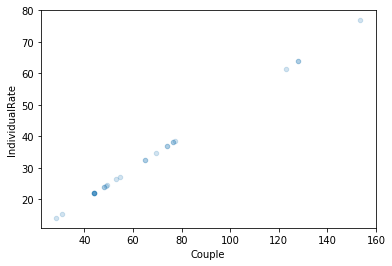

In [635]:
V.plot(kind='scatter', x='Couple', y='IndividualRate', alpha=0.2);

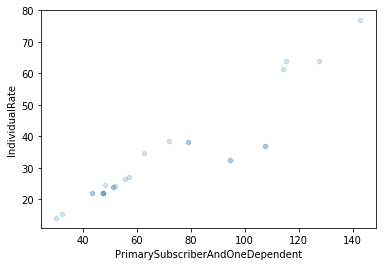

In [636]:
V.plot(kind='scatter', x='PrimarySubscriberAndOneDependent', y='IndividualRate', alpha=0.2);

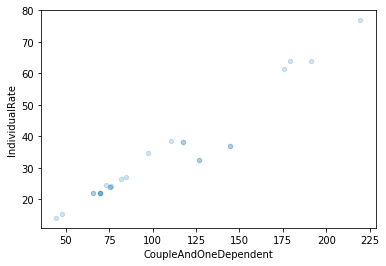

In [637]:
V.plot(kind='scatter', x='CoupleAndOneDependent', y='IndividualRate', alpha=0.2);

In [638]:
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

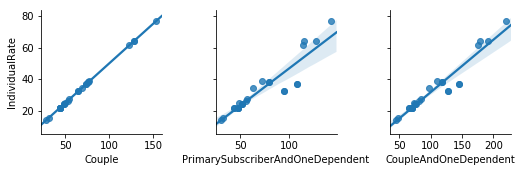

In [639]:
sns.pairplot(V, x_vars=feature_cols, y_vars='IndividualRate', kind='reg');

In [640]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [641]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [642]:
print(linreg.intercept_)
print(linreg.coef_)

0.0001635109086493003
[ 1.05397502  1.1078383  -1.10787086]


In [643]:
list(zip(feature_cols, linreg.coef_))

[('Couple', 1.0539750244792923),
 ('PrimarySubscriberAndOneDependent', 1.1078383008322086),
 ('CoupleAndOneDependent', -1.1078708603408303)]

                                    Couple  PrimarySubscriberAndOneDependent  \
Couple                            1.000000                          0.921547   
PrimarySubscriberAndOneDependent  0.921547                          1.000000   
CoupleAndOneDependent             0.965109                          0.991061   
IndividualRate                    1.000000                          0.921663   

                                  CoupleAndOneDependent  IndividualRate  
Couple                                         0.965109        1.000000  
PrimarySubscriberAndOneDependent               0.991061        0.921663  
CoupleAndOneDependent                          1.000000        0.965186  
IndividualRate                                 0.965186        1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


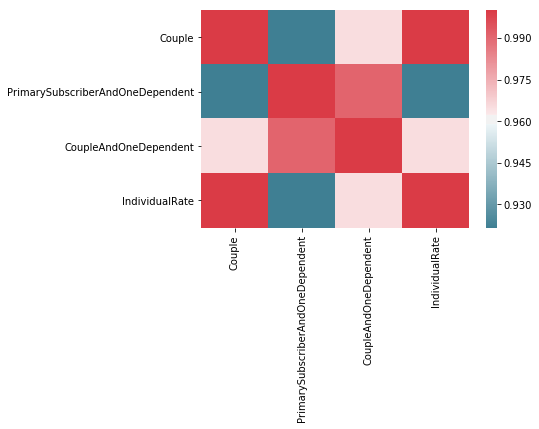

In [644]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = V.corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

In [645]:
from sklearn.model_selection import train_test_split
def train_test_rmse(df, feature_cols):
    X = df[feature_cols]
    y = df.IndividualRate
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [647]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [648]:
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
y_null

array([33.77285714, 33.77285714, 33.77285714, 33.77285714, 33.77285714,
       33.77285714, 33.77285714])

In [649]:
from sklearn import metrics
import numpy as np

In [650]:
np.sqrt(metrics.mean_squared_error(y_test, y_null))

13.912514114263885

In [687]:
from sklearn.linear_model import LinearRegression
from array import array
regressor = LinearRegression()
regressor.fit(X_train,y_train)

accuracy = regressor.score(X_test,y_test)
print('Accuracy: ',accuracy*100,'%')

Accuracy:  99.99999328701217 %


<a id="LinearRegressionModel:InsuranceratevsAVOutput"></a>
# Linear Regression Model: Insurance rate vs AV Output

In [652]:
result_1.AVCalculatorOutputNumber.isnull().sum()

22825

In [653]:
feature_cols2 = ['Couple','PrimarySubscriberAndOneDependent','CoupleAndOneDependent','IndividualRate','AVCalculatorOutputNumber']

In [654]:
Z=result_1[feature_cols2]
lr = LinearRegression()
type(lr)
Z.dropna(how='all').head()

,Couple,PrimarySubscriberAndOneDependent,CoupleAndOneDependent,IndividualRate,AVCalculatorOutputNumber
0,NaN,NaN,NaN,29.00,NaN
1,73.9,107.61,144.56,36.95,NaN
2,73.9,107.61,144.56,36.95,NaN
3,NaN,NaN,NaN,32.00,NaN
4,NaN,NaN,NaN,32.00,NaN


In [655]:
Z.dropna(inplace=True)
Z.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Couple,PrimarySubscriberAndOneDependent,CoupleAndOneDependent,IndividualRate,AVCalculatorOutputNumber
6,64.90,94.50,126.95,32.45,0.619164943695068
9,64.90,94.50,126.95,32.45,0.619164943695068
10,64.90,94.50,126.95,32.45,1
558,118.64,118.31,177.70,59.26,0.900174260139465
561,118.64,118.31,177.70,59.26,0.681479394435883


In [656]:
Z.shape

(173, 5)

In [657]:
feature_cols3 = ['IndividualRate','Couple','PrimarySubscriberAndOneDependent','CoupleAndOneDependent']
X1 = Z[feature_cols3]
y1 = Z.AVCalculatorOutputNumber

In [659]:
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

In [660]:
lr.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [661]:
# Import, instantiate, fit.
from sklearn.linear_model import LinearRegression
linreg1 = LinearRegression()
linreg1.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [662]:
# Print the coefficients.
print(linreg1.intercept_)
print(linreg1.coef_)


0.7944934613424802
[ 1.53541994 -1.64337388 -1.74763592  1.74884408]


In [663]:
list(zip(feature_cols3, linreg1.coef_))

[('IndividualRate', 1.5354199426652415),
 ('Couple', -1.6433738847251553),
 ('PrimarySubscriberAndOneDependent', -1.7476359207995926),
 ('CoupleAndOneDependent', 1.7488440808546732)]

                                    Couple  PrimarySubscriberAndOneDependent  \
Couple                            1.000000                          0.984864   
PrimarySubscriberAndOneDependent  0.984864                          1.000000   
CoupleAndOneDependent             0.993581                          0.998150   
IndividualRate                    1.000000                          0.984832   

                                  CoupleAndOneDependent  IndividualRate  
Couple                                         0.993581        1.000000  
PrimarySubscriberAndOneDependent               0.998150        0.984832  
CoupleAndOneDependent                          1.000000        0.993559  
IndividualRate                                 0.993559        1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


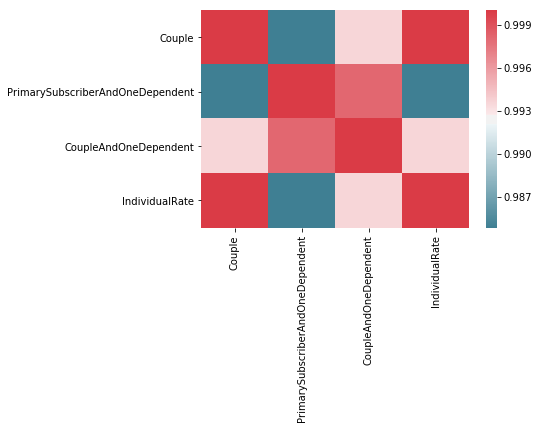

In [664]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = Z.corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

In [665]:
from sklearn.model_selection import train_test_split
def train_test_rmse(df, feature_cols3):
    X1 = df[feature_cols3]
    y1 = df.AVCalculatorOutputNumber
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X1_train, y1_train)
    y1_pred = linreg.predict(X1_test)
    return np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))

In [666]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, random_state=123)

In [667]:
y1_null = np.zeros_like(y1_test, dtype=float)
y1_null.fill(y1_test.mean())
y1_null

array([41.48857143, 41.48857143, 41.48857143, 41.48857143, 41.48857143,
       41.48857143, 41.48857143])

In [668]:
np.sqrt(metrics.mean_squared_error(y1_test, y1_null))

19.502271976487712

In [669]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [610]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=99)


In [602]:
from sklearn.linear_model import LinearRegression
from array import array
regressor = LinearRegression()
regressor.fit(X1_train,y1_train)

accuracy = regressor.score(X1_test,y1_test)
print(accuracy*100,'%')

99.99999020188253 %


<a id="TimeSeriesModel"></a>
# 6) Time Series Model

In [817]:
from datetime import datetime, date

In [818]:
ortho.head()

,BenefitName,BusinessYear_x,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,TEHBOutOfNetFamilyPerGroupMOOP,TEHBOutOfNetFamilyPerPersonMOOP,TEHBOutOfNetIndividualMOOP,TIN,URLForEnrollmentPayment,URLForSummaryofBenefitsCoverage,UniquePlanDesign,VersionNum,WellnessProgramOffered,Date
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN,2014-03-19 07:06:49
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN,2014-03-19 07:06:49
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/mymoda/,https://www.modahealth.com/pdfs/plans/individu...,NaN,6,NaN,2014-03-19 07:06:49
5,Basic Dental Care - Adult,2014,40%,NaN,40%,No Charge,NaN,No Charge,Above EHB,NaN,...,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN,2014-03-19 07:06:49
6,Orthodontia - Adult,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"$12,700",93-0989307,https://www.modahealth.com/mymoda/,https://www.modahealth.com/shop/explore-plans?...,Yes,6,Yes,2014-03-19 07:06:49


In [819]:
ortho['Date'] = pd.to_datetime(ortho.ImportDate_x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [820]:
e=[]
for i in ortho['Date']:  
    #print(i.year)
    a=str(i.year)
    b=str(i.month)
    c=str(i.day)
    d=a+'/'+b+'/'+c
    e.append(pd.to_datetime(d))


In [821]:
rate_dictionary={
    'Date':e,
    'Rate':list(ortho.IndividualRate)
}
rate_df=pd.DataFrame(rate_dictionary)


rate_df.head()

,Date,Rate
0,2014-03-19,29.00
1,2014-03-19,36.95
2,2014-03-19,32.00
3,2014-03-19,36.95
4,2014-03-19,32.45


In [822]:
rate_df.groupby('Date').mean()

,Rate
Date,
2013-06-04,44.590833
2013-06-06,300300.257167
2013-07-01,23.862917
2013-08-01,37.556111
2013-09-02,318.086736
2013-09-10,801427.027179
2013-09-16,18.129306
2013-09-17,428.156396
2013-10-15,449.172345


In [843]:
R=rate_df.groupby('Date').mean()


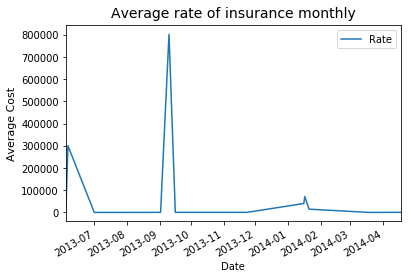

In [824]:
ax=R.plot()
ax.set_title('Average rate of insurance monthly', fontsize=14, y=1.01);
ax.set_ylabel('Average Cost', fontsize=11);

<h2><a id="C">Time Series Forecasting Methods</a></h2>

### Method 1: Naive Approach

In [825]:
from statsmodels.tsa.arima_model import ARIMA
train = R['2013': '2014']
test = R['2014']

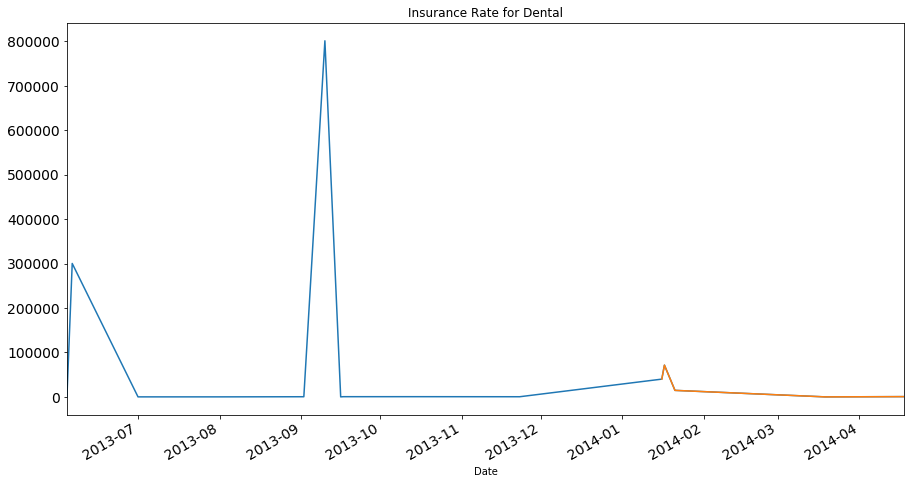

In [826]:
train.Rate.plot(figsize=(15,8), title= 'Insurance Rate for Dental', fontsize=14)
test.Rate.plot(figsize=(15,8), title= 'Insurance Rate for Dental', fontsize=14)
plt.show();

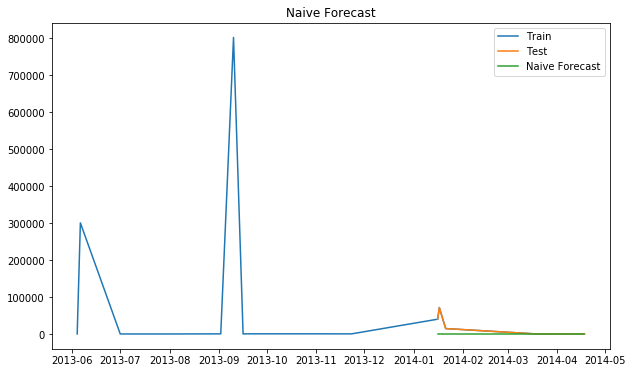

In [827]:
dd= np.asarray(train.Rate)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(10,6))
plt.plot(train.index, train['Rate'], label='Train')
plt.plot(test.index,test['Rate'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show();

In [828]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Rate, y_hat.naive))
aa=rms
print(aa)

36777.23347180845


In [829]:
from statsmodels.tsa.seasonal import seasonal_decompose

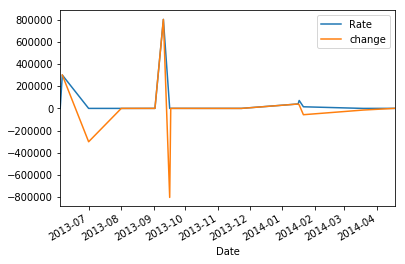

In [830]:
R['change'] = R.Rate.diff(1);
R.plot();

<Figure size 432x288 with 0 Axes>

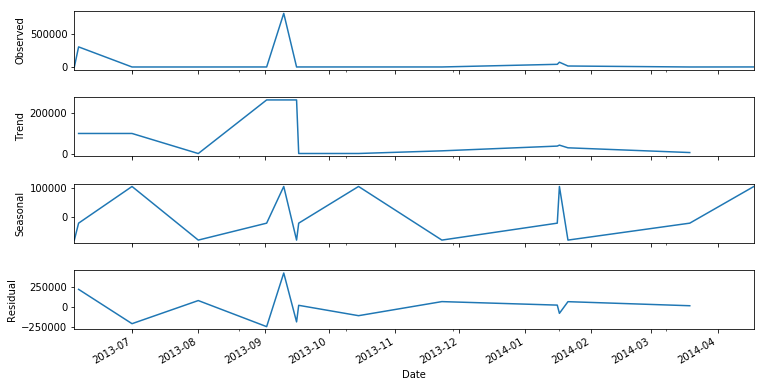

In [831]:
decomposition = seasonal_decompose(R.Rate, freq=3)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 6)

### Method 2: Simple Average

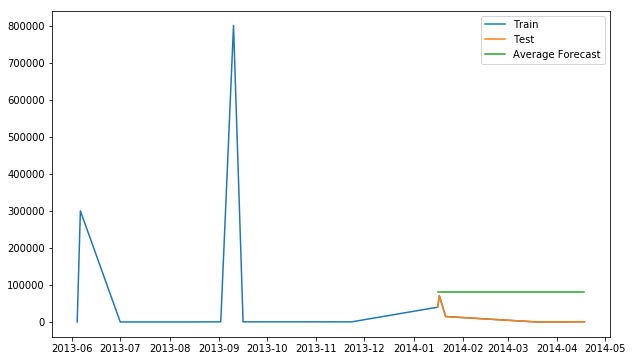

In [832]:
#Method 2
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Rate'].mean()
plt.figure(figsize=(10,6))
plt.plot(train['Rate'], label='Train')
plt.plot(test['Rate'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show();

In [833]:
rms = sqrt(mean_squared_error(test.Rate, y_hat_avg.avg_forecast))
bb=rms
print(bb)

62870.083291250514


### Method 3: Moving Average

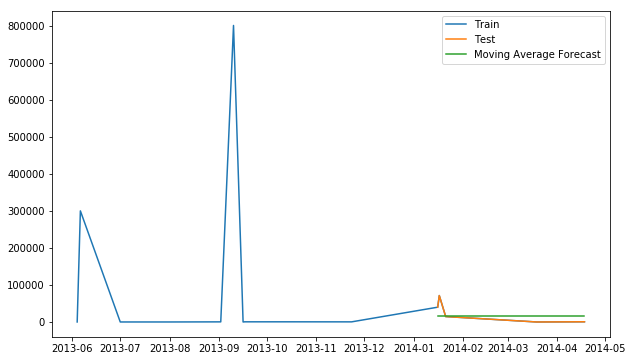

In [834]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Rate'].rolling(8).mean().iloc[-1]
plt.figure(figsize=(10,6))
plt.plot(train['Rate'], label='Train')
plt.plot(test['Rate'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show();

In [835]:
rms = sqrt(mean_squared_error(test.Rate, y_hat_avg.moving_avg_forecast))
cc=rms
print(cc)

28775.95205935369


### Method 4: Simple Exponential Smoothing 

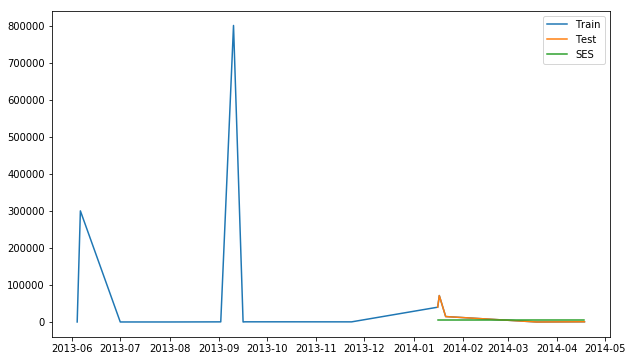

In [836]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Rate'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(10,6))
plt.plot(train['Rate'], label='Train')
plt.plot(test['Rate'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show();

In [837]:
rms = sqrt(mean_squared_error(test.Rate, y_hat_avg.SES))
dd=rms
print(dd)

33818.097310680525


### Method 5: Holt's Linear Trend

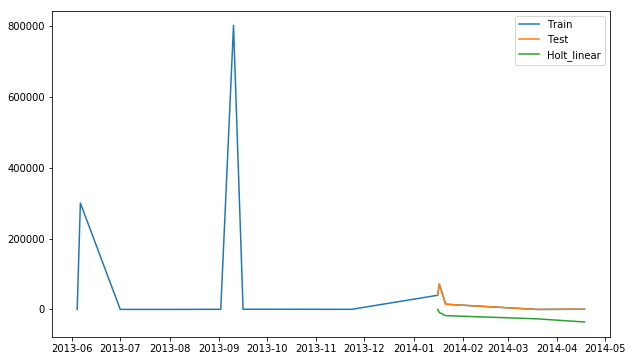

In [838]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Rate'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(10,6))
plt.plot(train['Rate'], label='Train')
plt.plot(test['Rate'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show();

In [839]:
rms = sqrt(mean_squared_error(test.Rate, y_hat_avg.Holt_linear))
ee=rms
print(ee)

46941.21779413684


### Method 6: Holt-Winters Method

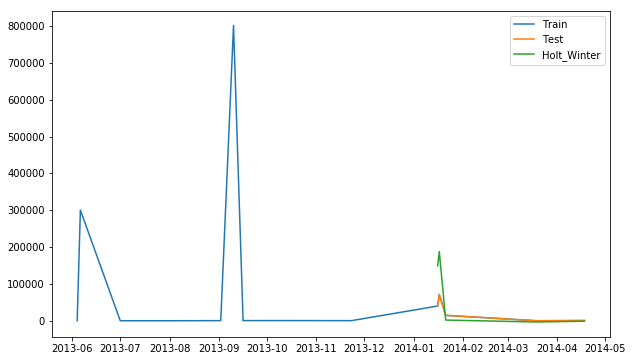

In [840]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Rate']) ,seasonal_periods=5 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(10,6))
plt.plot( train['Rate'], label='Train')
plt.plot(test['Rate'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [841]:
rms = sqrt(mean_squared_error(test.Rate, y_hat_avg.Holt_Winter))
ff=rms
print(ff)

71622.94267948088


In [842]:
print('The RMS for using the Naive Forcast model is: ', aa)
print('The RMS for using the Simple Average model is: ', bb)
print('The RMS for using the Moving Average model is: ', cc)
print('The RMS for using the Simple Exponential Smoothing model is: ', dd)
print('The RMS for using the Holts Linear Trend Model model is: ', ee)
print('The RMS for using the Holt Winter model is: ', ff)

The RMS for using the Naive Forcast model is:  36777.23347180845
The RMS for using the Simple Average model is:  62870.083291250514
The RMS for using the Moving Average model is:  28775.95205935369
The RMS for using the Simple Exponential Smoothing model is:  33818.097310680525
The RMS for using the Holts Linear Trend Model model is:  46941.21779413684
The RMS for using the Holt Winter model is:  71622.94267948088


<a id="Conclusion"></a>
# Conclusion

After using the Time series model, it seems that the Moving Average model seems to make a better prediction than the other type of models. The Root mean square error is very low, 28775, for this model so this model is an ideal forecast to use for predicting the insurance rate for the future months. The Decomposition graph shows a slight downward tend so the prediction model should show a lower average insurance rate for patients with the Dental benefit plan within the subsequent months of 2014 and 2015. 

The regression models seems to have showed a really high accuracy. Both models showed about 99% accuracy, which seems to show a strong relationship between the insurance rates and AV values.